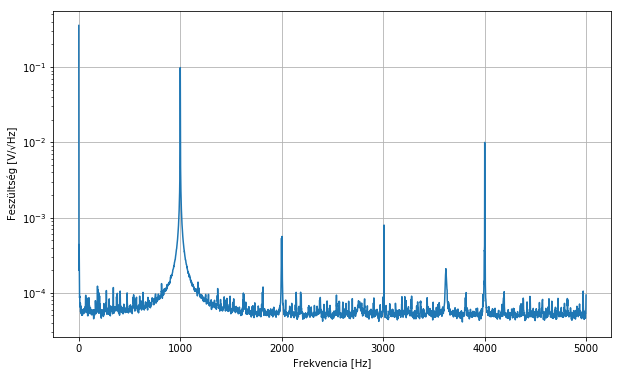

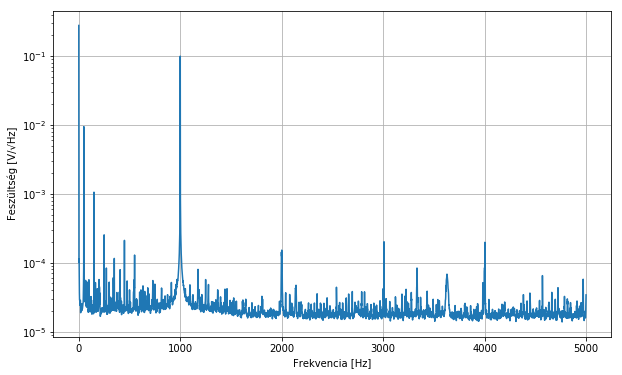

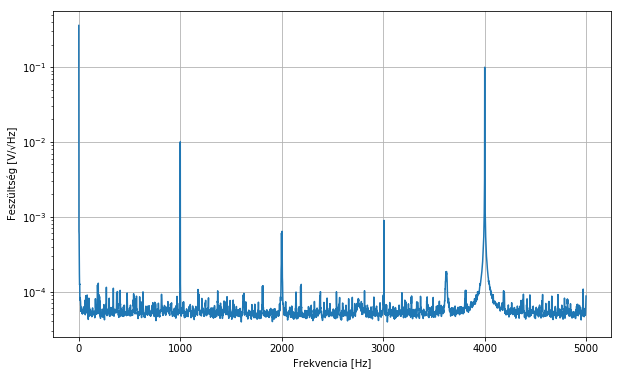

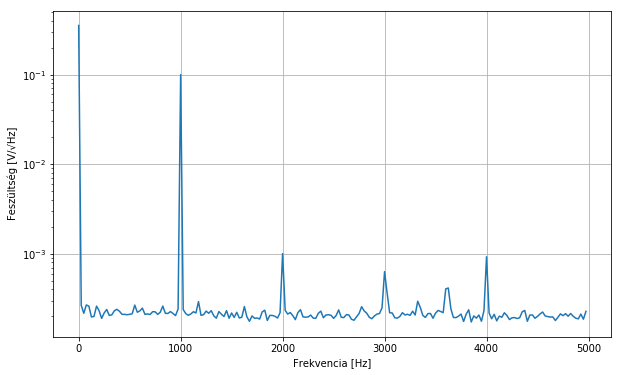

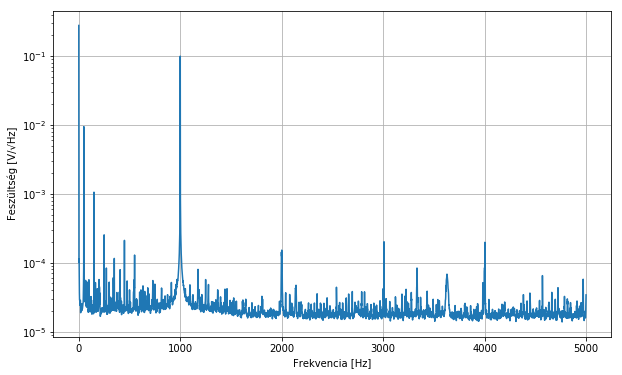

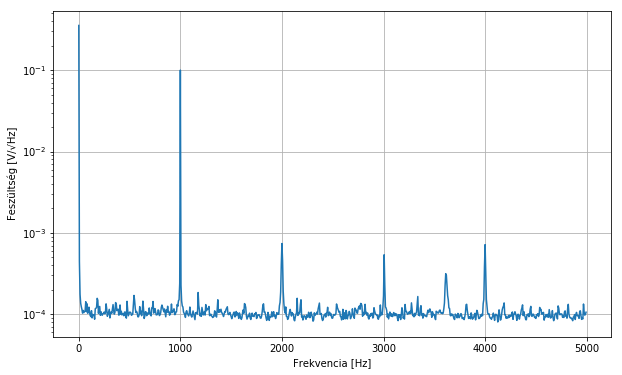

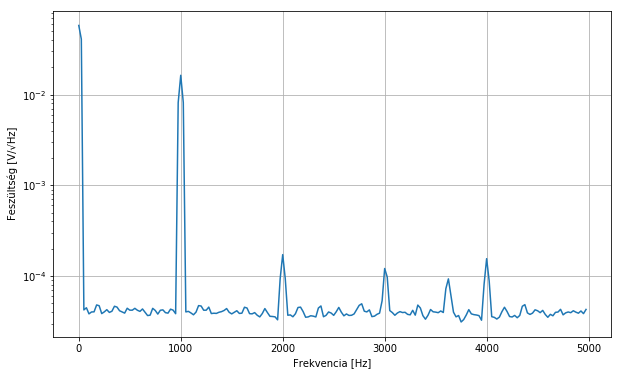

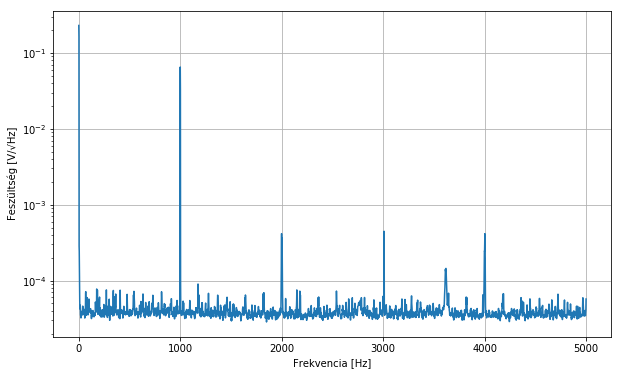

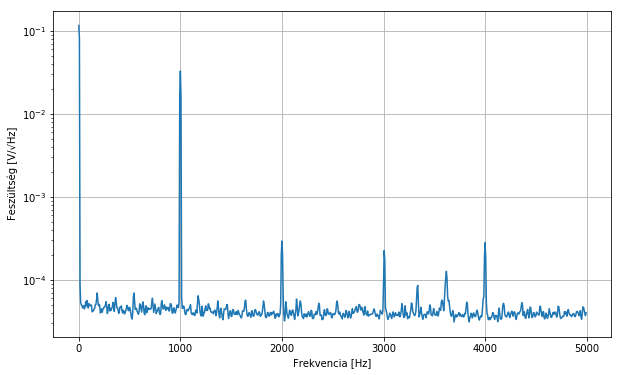

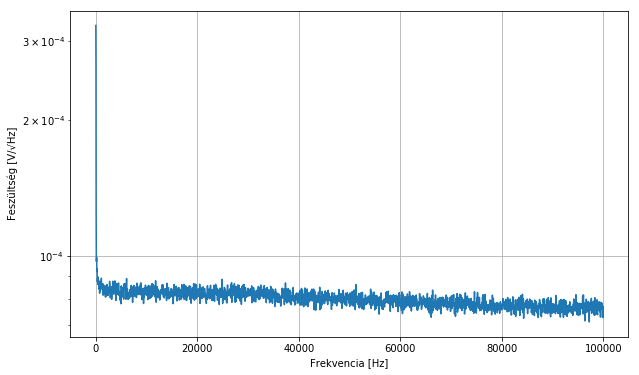

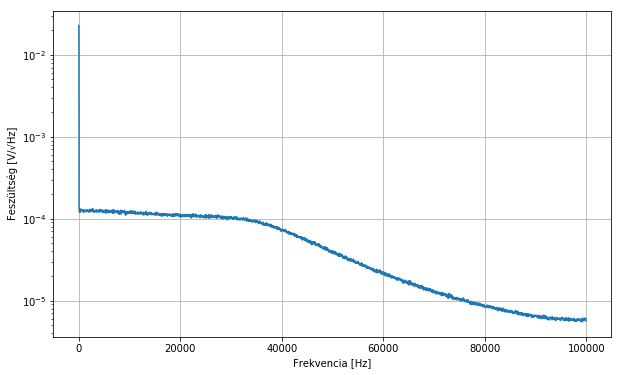

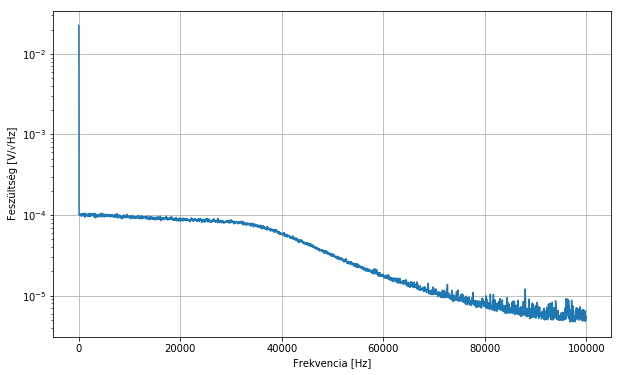

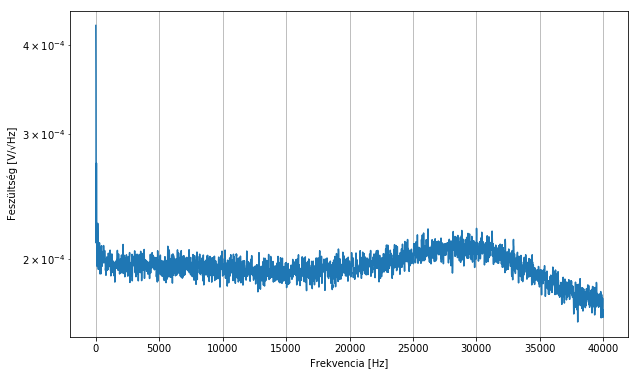

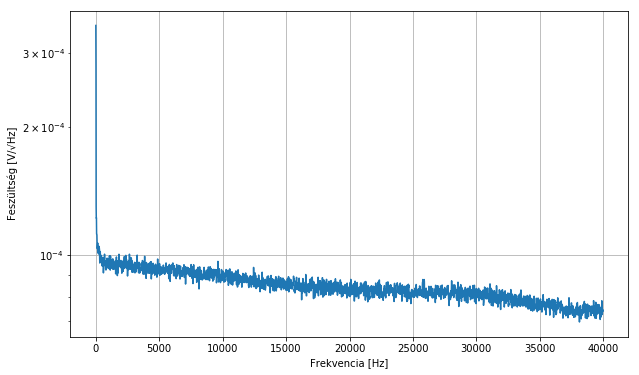

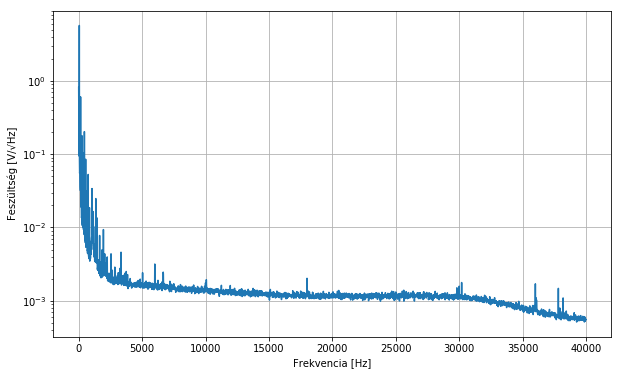

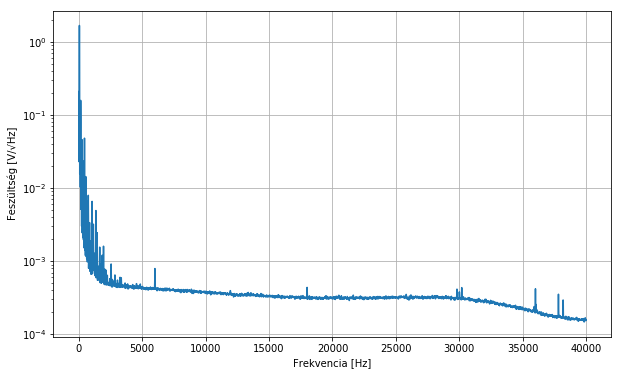

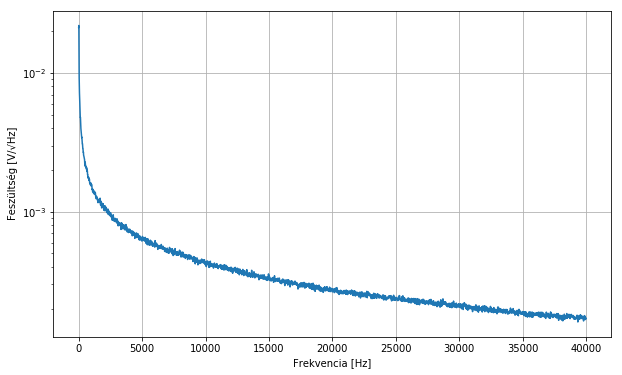

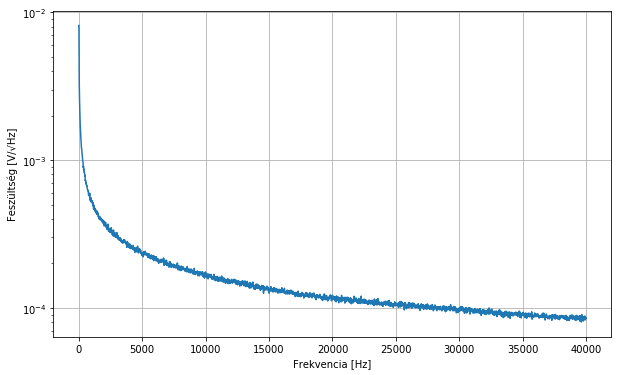

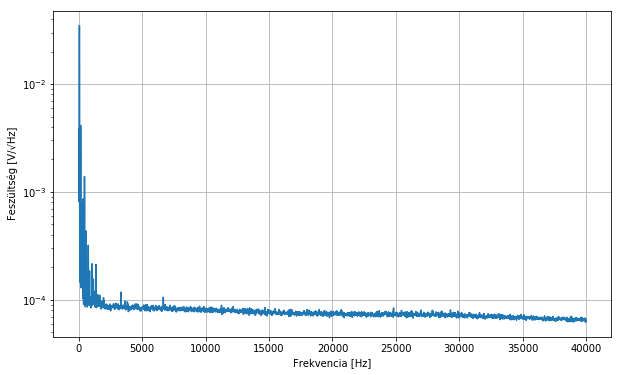

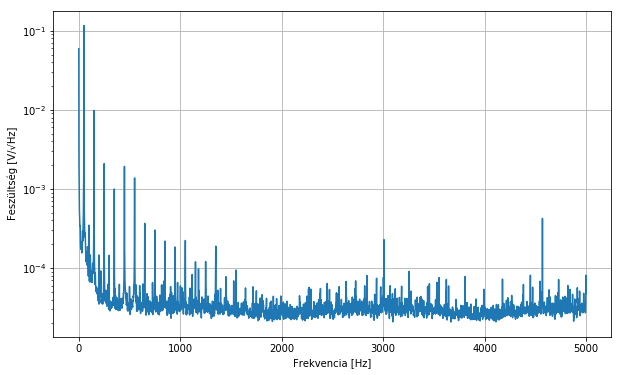

In [5]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

path ='E:\\marci main\\bme\\hfizlab2\\13zaj\\'

j=0
for filename in glob.glob(os.path.join(path, '*.txt')):
    #print(filename)
    i=0
    saving_start=0
    units=""
    freq = []
    db = []
    with open(filename) as f:
        j=j+1
        for line in f:
            i=i+1
            if "FFT" in line:
                saving_start=i
            if saving_start:
                if i == saving_start+1:
                    units=line[7:]
                elif i > saving_start+1:
                    try:
                        a = float(line.split("\t")[0].replace(',','.'))
                        freq.append(a)
                        b = float(line.split("\t")[1].replace(',','.'))
                        #b = (10**(b/20))*np.sqrt(2) #1-2 ps
                        #b = (10**((b-80)/20))*np.sqrt(2) #amplified ps - only 7-ps
                        #b = np.sqrt((10**((b-80)/10))*2) # amplified psd
                        b = np.sqrt((10**(b/10))*2) #2 psd
                        db.append(b)
                    except:
                        print("")
        
        if True:
            plt.figure(figsize=(10,6))
            plt.plot(freq,db)
            #plt.title(os.path.split(filename)[1][:-4])
            plt.ylabel("Feszültség [V/√Hz]")
            plt.xlabel("Frekvencia [Hz]")
            plt.grid(True)
            plt.gca().set_yscale("log")
            plt.savefig(filename[:-4]+"_amp.pdf")
            plt.show()
        
        if False and j>16 and j<19:
            print(filename)
            c = np.log(np.array(freq[1:]))
            d = np.log(np.array(db[1:]))
            p = np.polyfit(c,d,1)
            
            plt.figure(figsize=(10,6))
            plt.plot(c,d)
            plt.plot([2,10.65],[p[0]*2+p[1],p[0]*10.65+p[1]])
            plt.grid(True)
            plt.ylabel("Log Feszültség [V/√Hz]")
            plt.xlabel("Log Frekvencia [Hz]")
            plt.savefig(filename[:-4]+"_log.pdf")
            plt.show()
            
            print(p)
            